
<center>

# Glass Classification

Assignment submitted by :   ***[Ritvik Prasad M](https://github.com/greyhatguy007/)***

Registration Number             :   **210801159**

</center>

---

<u>**Context**</u>

This is a Glass Identification Data Set from UCI. It contains 9 attributes.

The response is glass type(discrete 7 values)

[Kaggle Link](https://www.kaggle.com/datasets/uciml/glass?datasetId=738)

[UCI dataset Link](https://archive.ics.uci.edu/ml/datasets/Glass+Identification)

---

<u>**Content**</u>

Attribute Information
- RI: refractive index 
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10) 
- Mg: Magnesium 
- Al: Aluminum 
- Si: Silicon 
- K: Potassium
- Ca: Calcium 
- Ba: Barium 
- Fe: Iron 
- Type of glass: (class attribute)  
    - 1 building_windows_float_processed 
    - 2 building_windows_non_float_processed 
    - 3 vehicle_windows_float_processed 
    - 4 vehicle_windows_non_float_processed (none in this database) 
    - 5 containers 
    - 6 tableware 
    - 7 headlamps



### Data Loading and Analysis1

In [2]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

In [3]:
# loading the model
df = pd.read_csv("./glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


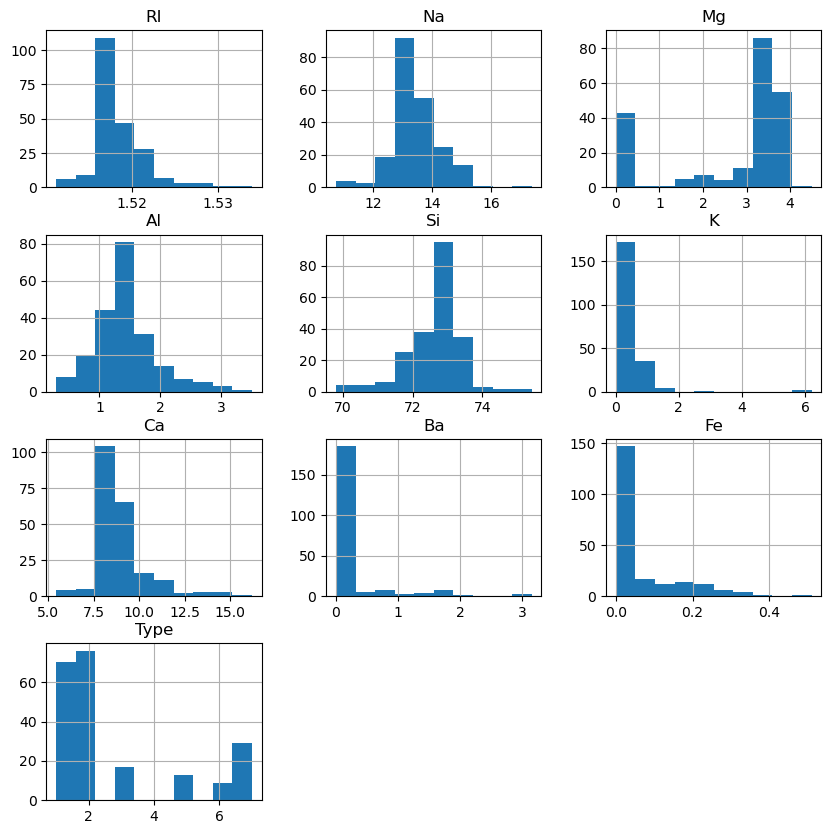

In [5]:
# understanding the correlation between the data
df.hist(figsize=(10,10));

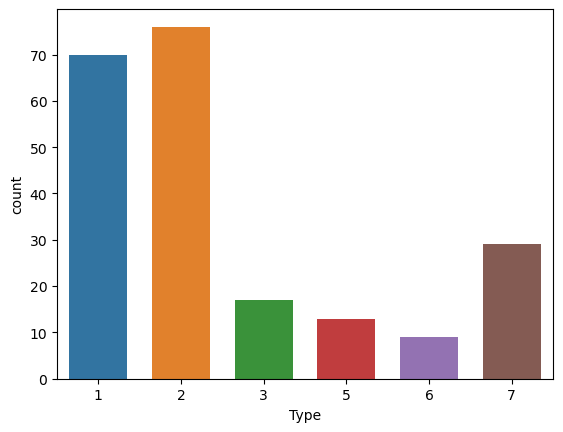

In [6]:
# analyzing the number and types of outputs
sns.countplot(x=df["Type"], width=0.7);

In [7]:
# finding the total number of possible outcomes
df.Type.unique(), len(df.Type.unique())

(array([1, 2, 3, 5, 6, 7]), 6)

**Inference**

As the data outcomes are discrete, we would use a multiclass classification algorithm such as non-binary multiclass classification.

For this data, I will use **Random Forest Classifier** Algorithm.

### Model Creation and Training

In [8]:
# splitting the data into labels and outcomes
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape , y.shape

((214, 9), (214,))

In [9]:
# splitting the data into train and test set with test size of 0.2 as the availability of data is less
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# importing necessary libraries for model creation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [12]:
# creating the pipeline for the model and getting the pipeline paramerters
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("randomForest", RandomForestClassifier())
])
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('randomForest', RandomForestClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'randomForest': RandomForestClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'randomForest__bootstrap': True,
 'randomForest__ccp_alpha': 0.0,
 'randomForest__class_weight': None,
 'randomForest__criterion': 'gini',
 'randomForest__max_depth': None,
 'randomForest__max_features': 'sqrt',
 'randomForest__max_leaf_nodes': None,
 'randomForest__max_samples': None,
 'randomForest__min_impurity_decrease': 0.0,
 'randomForest__min_samples_leaf': 1,
 'randomForest__min_samples_split': 2,
 'randomForest__min_weight_fraction_leaf': 0.0,
 'randomForest__n_estimators': 100,
 'randomForest__n_jobs': None,
 'randomForest__oob_score': False,
 'randomForest__random_state': None,
 'randomForest__verbose': 0,
 'randomForest__warm_start': False}

In [117]:
# creating a cross validation estimator grid with estimators and maximum depth as grid parameters

estimator = GridSearchCV(estimator=pipe, param_grid={
    'randomForest__n_estimators':[i for i in range(50,150,5)],
    'randomForest__max_depth':[i for i in range(1,11)]
}, scoring='accuracy', cv=3)

In [118]:
# fitting the estimator
estimator.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('randomForest',
                                        RandomForestClassifier())]),
             param_grid={'randomForest__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10],
                         'randomForest__n_estimators': [50, 55, 60, 65, 70, 75,
                                                        80, 85, 90, 95, 100,
                                                        105, 110, 115, 120, 125,
                                                        130, 135, 140, 145]},
             scoring='accuracy')

In [119]:
# storing the results of the estimator in a dataframe
result_df = pd.DataFrame(estimator.cv_results_)

In [120]:
# getting the parameters for the best optimum model
print(estimator.best_index_)
print(estimator.best_params_)
print(estimator.best_score_)

145
{'randomForest__max_depth': 8, 'randomForest__n_estimators': 75}
0.7543859649122807


In [121]:
# getting the details about best optimum model from result database
result_df.iloc[150]

mean_fit_time                                                                0.135819
std_fit_time                                                                  0.00662
mean_score_time                                                              0.009605
std_score_time                                                               0.000944
param_randomForest__max_depth                                                       8
param_randomForest__n_estimators                                                  100
params                              {'randomForest__max_depth': 8, 'randomForest__...
split0_test_score                                                            0.561404
split1_test_score                                                            0.824561
split2_test_score                                                            0.719298
mean_test_score                                                              0.701754
std_test_score                                        

In [122]:
# creating an improvised estimator with parameters close to best estimate of previous estimator

estimator_improvised = GridSearchCV(estimator=pipe, param_grid={
    'randomForest__n_estimators':[i for i in range(50,61)],
    'randomForest__max_depth':[i for i in range(7,14)]
}, scoring='accuracy', cv=3)

In [123]:
# fitting the improvised estimator
estimator_improvised.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('randomForest',
                                        RandomForestClassifier())]),
             param_grid={'randomForest__max_depth': [7, 8, 9, 10, 11, 12, 13],
                         'randomForest__n_estimators': [50, 51, 52, 53, 54, 55,
                                                        56, 57, 58, 59, 60]},
             scoring='accuracy')

In [124]:
# storing the results of improvised estimator in a dataframe
result2_df = pd.DataFrame(estimator.cv_results_)


In [125]:
result2_df.to_csv("result2.csv")

In [126]:
# getting the parameters for the best optimum model from the improvised estimator
print(estimator_improvised.best_index_)
print(estimator_improvised.best_params_)
print(estimator_improvised.best_score_)

5
{'randomForest__max_depth': 7, 'randomForest__n_estimators': 55}
0.7719298245614036


In [127]:
# getting the details about best optimum model from improvised result database
result2_df.iloc[181]

mean_fit_time                                                                0.078363
std_fit_time                                                                 0.000689
mean_score_time                                                              0.006414
std_score_time                                                               0.001151
param_randomForest__max_depth                                                      10
param_randomForest__n_estimators                                                   55
params                              {'randomForest__max_depth': 10, 'randomForest_...
split0_test_score                                                            0.596491
split1_test_score                                                            0.842105
split2_test_score                                                             0.77193
mean_test_score                                                              0.736842
std_test_score                                        

In [128]:
# getting the top 2 estimators
model1 = estimator.best_estimator_
model2 = estimator_improvised.best_estimator_

### Model Evaluation

In [143]:
# comparing the top two models

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
preds = model1.predict(X_test)
preds_train = model1.predict(X_train)
accuracy_test = accuracy_score(y_true=y_test, y_pred=preds)
accuracy_train = accuracy_score(y_true=y_train, y_pred=preds_train) 
cmatrix = confusion_matrix(y_true=y_test, y_pred=preds)
print(f'Model 1 Metrics')
print(f'accuracy (test)       : {accuracy_test}\n\tin precentage :\t{accuracy_test*100} %\n')
print(f'accuracy (train)      : {accuracy_train}\n\tin precentage :\t{accuracy_train*100} %\n')
print(f'confusion matrix (for 6 outcomes):\n{cmatrix}')

preds = model2.predict(X_test)
preds_train = model2.predict(X_train)
accuracy_test = accuracy_score(y_true=y_test, y_pred=preds)
accuracy_train = accuracy_score(y_true=y_train, y_pred=preds_train) 
cmatrix = confusion_matrix(y_true=y_test, y_pred=preds)
print(f'\nModel 2 Metrics')
print(f'accuracy (test)       : {accuracy_test}\n\tin precentage :\t{accuracy_test*100} %\n')
print(f'accuracy (train)      : {accuracy_train}\n\tin precentage :\t{accuracy_train*100} %\n')
print(f'confusion matrix (for 6 outcomes):\n{cmatrix}')

Model 1 Metrics
accuracy (test)       : 0.8837209302325582
	in precentage :	88.37209302325581 %

accuracy (train)      : 0.9883040935672515
	in precentage :	98.83040935672514 %

confusion matrix (for 6 outcomes):
[[11  0  0  0  0  0]
 [ 3 11  0  0  0  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]

Model 2 Metrics
accuracy (test)       : 0.8604651162790697
	in precentage :	86.04651162790698 %

accuracy (train)      : 1.0
	in precentage :	100.0 %

confusion matrix (for 6 outcomes):
[[11  0  0  0  0  0]
 [ 1 11  1  0  0  1]
 [ 1  0  2  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


We can see that *model2* perfoms better on train set than test set by a margin of **1.17%** and  *model1* perfoms better on test set than train set by a margin of **2.325%**.

Hence, from this observation, we can say that model1 outperfoms model2.

Therefore model1 is the most optimum model.

### Exporting the Model

In [145]:
# exporting the model in .joblib format
from joblib import dump
dump(model1, "glass_pred.joblib")

['glass_pred.joblib']

In [146]:
# loading the model and finding its accuracy

from joblib import load
from sklearn.metrics import accuracy_score

load_model = load("./glass_pred.joblib")

pred_load = load_model.predict(X_test)
accuracy_load_model = accuracy_score(y_true=y_test,y_pred=pred_load)
print(f'Accuracy of the model loed : {accuracy_load_model*100} %')

Accuracy of the model loed : 88.37209302325581 %


### Conclusion

Hence, a **Random Forest Classifier** algorithm is implemented on the given data and a Machine Learning model with 88% accuracy is obtained.